# project_jovian_final



**Documentation:**
Using this available data(New York City Taxi Trip Duration) I will predict the duration of trip duration, I will predict the total duration of a trip in new york city using 2 models Linear Regression and Decision Tree Regressor, and based on the loss I will choose the best to train my model and to predict the total duration for the test data. This data contain training data and test data and for the input columns, I drop 1 column called[ 'dropoff_datetime']because it is not available on the test data and I consider 'trip_duration' as the target because that's what we are looking for. for numeric data I apply feature engineering on ['dropoff_datetime'], I split it to [ year, month, and day ], and on my numeric columns I drop [year] because have the same value(Year=2016), also I drop ' [vendor_id and passenger_count'] columns because they are not useful and will not help to get the right prediction. on my categorical columns I drop ['id and dropoff_datetime'] because they are not useful and I keep only ['store_and_fwd_flag']. I train 2 models and I choose Decision Tree Regressor because it has less root mean square error.*

In [2]:
!pip install jovian --upgrade --quiet

In [3]:
import jovian

In [4]:
# Execute this to save new versions of the notebook
jovian.commit(project="projectjovianfinal")

[jovian] Detected Colab notebook...
[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ··········
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/bouanane133/projectjovianfinal


'https://jovian.ai/bouanane133/projectjovianfinal'

In [5]:
!pip install opendatasets --quiet

In [6]:
import numpy as np
import pandas as pd
import opendatasets as od
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
od.download('https://www.kaggle.com/c/nyc-taxi-trip-duration')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: nouhailabouanane
Your Kaggle Key: ··········


100%|██████████| 85.8M/85.8M [00:00<00:00, 120MB/s]



Extracting archive ./nyc-taxi-trip-duration/nyc-taxi-trip-duration.zip to ./nyc-taxi-trip-duration


In [8]:
os.listdir('nyc-taxi-trip-duration')

['test.zip', 'train.zip', 'sample_submission.zip']

In [9]:
taxi_df=pd.read_csv('nyc-taxi-trip-duration/train.zip')
test_df=pd.read_csv('nyc-taxi-trip-duration/test.zip')
submission_df = pd.read_csv('nyc-taxi-trip-duration/sample_submission.zip')

**descovering data**

In [10]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [11]:
test_df.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [12]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [13]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [14]:
taxi_df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [15]:
taxi_df['store_and_fwd_flag'].describe()

count     1458644
unique          2
top             N
freq      1450599
Name: store_and_fwd_flag, dtype: object

In [16]:
taxi_df

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


 **Correlation**

In [17]:
taxi_df.pickup_latitude.corr(taxi_df.trip_duration)

-0.02920447086833206

In [18]:
taxi_df.dropoff_latitude.corr(taxi_df.trip_duration)

-0.020676530250917795

In [19]:
taxi_df.pickup_longitude.corr(taxi_df.trip_duration)

0.026542259424659743

In [20]:
taxi_df.vendor_id.corr(taxi_df.trip_duration)

0.020304177490054868

In [21]:
taxi_df.corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.287415,0.007820,0.001742,0.001528,0.004496,0.020304
passenger_count,0.287415,1.000000,0.002169,-0.005125,-0.000343,-0.002762,0.008471
pickup_longitude,0.007820,0.002169,1.000000,0.022568,0.783582,0.100190,0.026542
pickup_latitude,0.001742,-0.005125,0.022568,1.000000,0.114884,0.494038,-0.029204
dropoff_longitude,0.001528,-0.000343,0.783582,0.114884,1.000000,0.124873,0.014678
dropoff_latitude,0.004496,-0.002762,0.100190,0.494038,0.124873,1.000000,-0.020677
trip_duration,0.020304,0.008471,0.026542,-0.029204,0.014678,-0.020677,1.000000


Text(0.5, 1.0, 'Correlation matrix')

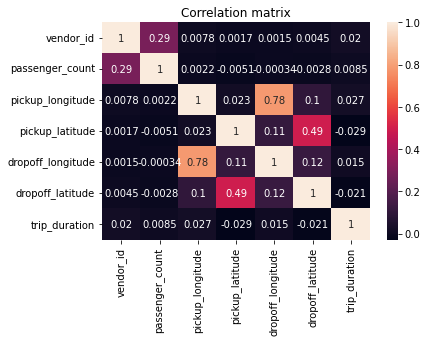

In [22]:
sns.heatmap(taxi_df.corr(),annot=True)
plt.title("Correlation matrix")

**Preprocessing and Feature engineering**

In [23]:
def split_Date(df):
  df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
  df['Year']=df.pickup_datetime.dt.year
  df['Month']=df.pickup_datetime.dt.month
  df['Day']=df.pickup_datetime.dt.day
  df['Hour']=df.pickup_datetime.dt.hour

In [24]:
split_Date(taxi_df)
split_Date(test_df)

In [25]:
taxi_df['Year'].describe()

count    1458644.0
mean        2016.0
std            0.0
min         2016.0
25%         2016.0
50%         2016.0
75%         2016.0
max         2016.0
Name: Year, dtype: float64

In [26]:
taxi_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Year,Month,Day,Hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,2016,3,14,17
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,2016,6,12,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,2016,1,19,11
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,2016,4,6,19
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,2016,3,26,13


**Identify Inputs and Targets**

In [27]:
input_cols=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','store_and_fwd_flag','Month','Day','Hour']

In [28]:
target_col=['trip_duration']

In [29]:
inputs=taxi_df[input_cols].copy()
targets=taxi_df[target_col].copy()

In [30]:
inputs_test=test_df[input_cols].copy()

**Identify numeric and categorical columns**

In [31]:
taxi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 15 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  object        
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
 11  Year                1458644 non-null  int64         
 12  Month               1458644 non-null  int64         
 13  Day         

In [32]:
categorical_cols=taxi_df.select_dtypes('object').columns.tolist()

In [33]:
categorical_cols

['id', 'dropoff_datetime', 'store_and_fwd_flag']

In [34]:
numeric_cols=taxi_df.select_dtypes(include=['int64','float64'])

In [35]:
numeric_cols

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Year,Month,Day,Hour
0,2,1,-73.982155,40.767937,-73.964630,40.765602,455,2016,3,14,17
1,1,1,-73.980415,40.738564,-73.999481,40.731152,663,2016,6,12,0
2,2,1,-73.979027,40.763939,-74.005333,40.710087,2124,2016,1,19,11
3,2,1,-74.010040,40.719971,-74.012268,40.706718,429,2016,4,6,19
4,2,1,-73.973053,40.793209,-73.972923,40.782520,435,2016,3,26,13
...,...,...,...,...,...,...,...,...,...,...,...
1458639,2,4,-73.982201,40.745522,-73.994911,40.740170,778,2016,4,8,13
1458640,1,1,-74.000946,40.747379,-73.970184,40.796547,655,2016,1,10,7
1458641,2,1,-73.959129,40.768799,-74.004433,40.707371,764,2016,4,22,6
1458642,1,1,-73.982079,40.749062,-73.974632,40.757107,373,2016,1,5,15


In [36]:
my_numerical_cols=['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','Month','Day','Hour']
my_categorical_col=['store_and_fwd_flag']

**impute Numerical data**

In [37]:
taxi_df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Year                  0
Month                 0
Day                   0
Hour                  0
dtype: int64

**There is no imputation because there isn't null values**

In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler().fit(inputs[my_numerical_cols])

In [40]:
inputs[my_numerical_cols]=scaler.transform(inputs[my_numerical_cols])
inputs_test[my_numerical_cols]=scaler.transform(inputs_test[my_numerical_cols])

In [41]:
inputs[my_numerical_cols]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,Day,Hour
0,0.791302,0.365738,0.791591,0.731222,0.4,0.433333,0.739130
1,0.791331,0.364062,0.791016,0.728287,1.0,0.366667,0.000000
2,0.791354,0.365510,0.790920,0.726493,0.0,0.600000,0.478261
3,0.790842,0.363001,0.790805,0.726206,0.6,0.166667,0.826087
4,0.791452,0.367181,0.791454,0.732663,0.4,0.833333,0.565217
...,...,...,...,...,...,...,...
1458639,0.791302,0.364459,0.791092,0.729055,0.6,0.233333,0.565217
1458640,0.790992,0.364565,0.791500,0.733858,0.0,0.300000,0.304348
1458641,0.791682,0.365787,0.790935,0.726262,0.6,0.700000,0.260870
1458642,0.791304,0.364661,0.791426,0.730498,0.0,0.133333,0.652174


In [42]:
inputs[my_numerical_cols].describe().loc[['min', 'max']]

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,Day,Hour
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0


**Encode Categorical Value**

In [43]:
from sklearn.preprocessing import OneHotEncoder

In [44]:
encoder=OneHotEncoder(sparse=False,handle_unknown='ignore').fit(inputs[my_categorical_col])

In [45]:
encoded_cols=list(encoder.get_feature_names(my_categorical_col))

In [46]:
encoded_cols

['store_and_fwd_flag_N', 'store_and_fwd_flag_Y']

In [47]:
inputs[encoded_cols]=encoder.transform(inputs[my_categorical_col])
inputs_test[encoded_cols]=encoder.transform(inputs_test[my_categorical_col])

In [48]:
inputs

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,Month,Day,Hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.791302,0.365738,0.791591,0.731222,N,0.4,0.433333,0.739130,1.0,0.0
1,0.791331,0.364062,0.791016,0.728287,N,1.0,0.366667,0.000000,1.0,0.0
2,0.791354,0.365510,0.790920,0.726493,N,0.0,0.600000,0.478261,1.0,0.0
3,0.790842,0.363001,0.790805,0.726206,N,0.6,0.166667,0.826087,1.0,0.0
4,0.791452,0.367181,0.791454,0.732663,N,0.4,0.833333,0.565217,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1458639,0.791302,0.364459,0.791092,0.729055,N,0.6,0.233333,0.565217,1.0,0.0
1458640,0.790992,0.364565,0.791500,0.733858,N,0.0,0.300000,0.304348,1.0,0.0
1458641,0.791682,0.365787,0.790935,0.726262,N,0.6,0.700000,0.260870,1.0,0.0
1458642,0.791304,0.364661,0.791426,0.730498,N,0.0,0.133333,0.652174,1.0,0.0


In [49]:
X=inputs[my_numerical_cols+encoded_cols]
X_test=inputs_test[my_numerical_cols+encoded_cols]

In [50]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Month,Day,Hour,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,0.791302,0.365738,0.791591,0.731222,0.4,0.433333,0.739130,1.0,0.0
1,0.791331,0.364062,0.791016,0.728287,1.0,0.366667,0.000000,1.0,0.0
2,0.791354,0.365510,0.790920,0.726493,0.0,0.600000,0.478261,1.0,0.0
3,0.790842,0.363001,0.790805,0.726206,0.6,0.166667,0.826087,1.0,0.0
4,0.791452,0.367181,0.791454,0.732663,0.4,0.833333,0.565217,1.0,0.0
...,...,...,...,...,...,...,...,...,...
1458639,0.791302,0.364459,0.791092,0.729055,0.6,0.233333,0.565217,1.0,0.0
1458640,0.790992,0.364565,0.791500,0.733858,0.0,0.300000,0.304348,1.0,0.0
1458641,0.791682,0.365787,0.790935,0.726262,0.6,0.700000,0.260870,1.0,0.0
1458642,0.791304,0.364661,0.791426,0.730498,0.0,0.133333,0.652174,1.0,0.0


In [51]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/bouanane133/projectjovianfinal


'https://jovian.ai/bouanane133/projectjovianfinal'

**Model 1:**


In [52]:
from sklearn.linear_model import LinearRegression


In [53]:
model=LinearRegression().fit(X,targets)

In [54]:
preds=model.predict(X)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
rmse=mean_squared_error(targets,preds)

In [57]:
rmse

27381916.98231716

In [58]:
model.coef_

array([[ 1.55251096e+05, -6.50287204e+04, -3.74185594e+04,
        -1.99265487e+04,  1.00788583e+02,  8.50912019e+00,
         6.73144469e+01, -3.89450067e+01,  3.89450067e+01]])

In [59]:
model.intercept_

array([-54087.00054629])

In [60]:
predsTest=model.predict(X_test)

In [61]:
predsTest

array([[1075.38800369],
       [1482.96275556],
       [1074.54380897],
       ...,
       [ 779.86133149],
       [ 609.9081916 ],
       [ 936.94159441]])

In [62]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/bouanane133/projectjovianfinal


'https://jovian.ai/bouanane133/projectjovianfinal'

**Model 2:**

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
model2=DecisionTreeRegressor(random_state=42).fit(X,targets)

**Evaluation**

In [65]:
pred2=model2.predict(X)

In [66]:
pred2

array([ 455.,  663., 2124., ...,  764.,  373.,  198.])

In [67]:
targets

,trip_duration
0,455
1,663
2,2124
3,429
4,435
...,...
1458639,778
1458640,655
1458641,764
1458642,373


In [68]:
predTest=model2.predict(X_test)

In [69]:
predTest

array([ 397.,  498.,  624., ..., 1442., 1620.,  950.])

In [70]:
from sklearn.metrics import mean_squared_error

In [71]:
rmse2=mean_squared_error(pred2,targets)


In [72]:
rmse2

11.389811359043057

**Train_test_split**

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train,X_val,train_target,val_target=train_test_split(X,targets,test_size=0.2)

**Prediction and Evaluation**

In [75]:
rmseTrain=mean_squared_error(model2.predict(X_train),train_target)
rmseTrain

13.749236448241732

In [76]:
rmseVal=mean_squared_error(model2.predict(X_val),val_target)
rmseVal

1.952119089977342

In [77]:
model2.score(X_train,train_target)

0.999999567939187

In [78]:
model2.score(X_val,val_target)

0.9999998020851141

**KFold**


In [79]:
from sklearn.model_selection import KFold

In [80]:
kfolds=KFold(n_splits=6,shuffle=True)

In [81]:
for train_input,val_input in kfolds.split(X):
  inp_train,inp_target=X.iloc[train_input],targets.iloc[train_input]
  val_train,val_target=X.iloc[val_input],targets.iloc[val_input]
  rmse_input_train=mean_squared_error(model2.predict(inp_train),inp_target)
  rmse_input_val=mean_squared_error(model2.predict(val_train),val_target)
  print("Train Rmse: {} and Validation Rmse: {}".format(rmse_input_train,rmse_input_val))

Train Rmse: 8.25315128470074 and Validation Rmse: 27.073060121427513
Train Rmse: 9.274479941359203 and Validation Rmse: 21.966433642660874
Train Rmse: 11.418630407795073 and Validation Rmse: 11.245715878193552
Train Rmse: 13.378819196782986 and Validation Rmse: 1.44475580711374
Train Rmse: 13.107050217311361 and Validation Rmse: 2.8036029402690996
Train Rmse: 12.906732785591883 and Validation Rmse: 3.8051917468439824


**visualization**

In [82]:
from sklearn.tree import plot_tree,export_text

[Text(1653.0749999999998, 747.4499999999999, 'pickup_longitude <= 0.793\nmse = 27430672.263\nsamples = 1458644\nvalue = 959.492'),
 Text(850.9499999999999, 611.55, 'dropoff_longitude <= 0.792\nmse = 16538214.58\nsamples = 1386286\nvalue = 891.381'),
 Text(446.4, 475.65, 'dropoff_latitude <= 0.726\nmse = 16535683.285\nsamples = 1338013\nvalue = 848.659'),
 Text(223.2, 339.74999999999994, 'pickup_latitude <= 0.363\nmse = 10439169.602\nsamples = 48495\nvalue = 1473.992'),
 Text(111.6, 203.8499999999999, 'dropoff_latitude <= 0.726\nmse = 10709106.916\nsamples = 23687\nvalue = 1022.715'),
 Text(55.8, 67.94999999999993, '\n  (...)  \n'),
 Text(167.39999999999998, 67.94999999999993, '\n  (...)  \n'),
 Text(334.79999999999995, 203.8499999999999, 'pickup_latitude <= 0.363\nmse = 9801319.204\nsamples = 24808\nvalue = 1904.878'),
 Text(279.0, 67.94999999999993, '\n  (...)  \n'),
 Text(390.59999999999997, 67.94999999999993, '\n  (...)  \n'),
 Text(669.5999999999999, 339.74999999999994, 'dropoff_la

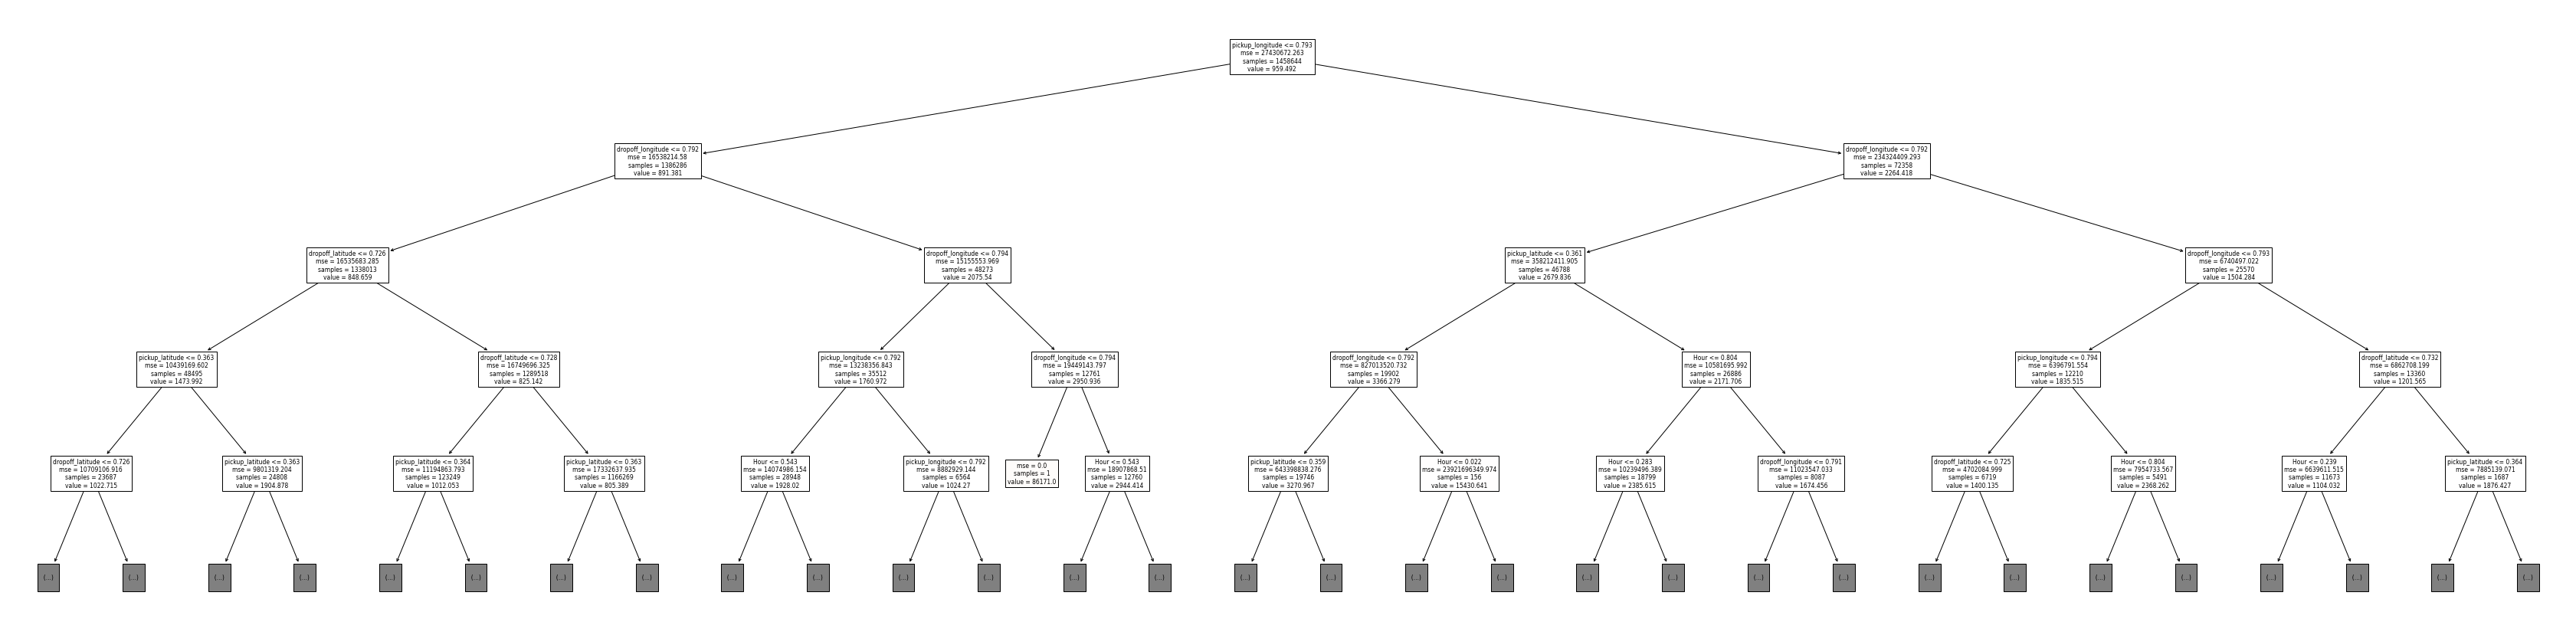

In [83]:
plt.figure(figsize=(60,15))
plot_tree(model2,max_depth=4,feature_names=X.columns,impurity=True,filled=True)

In [84]:
tree_txt=export_text(model2,max_depth=8,feature_names=list(X.columns))
tree_txt

'|--- pickup_longitude <= 0.79\n|   |--- dropoff_longitude <= 0.79\n|   |   |--- dropoff_latitude <= 0.73\n|   |   |   |--- pickup_latitude <= 0.36\n|   |   |   |   |--- dropoff_latitude <= 0.73\n|   |   |   |   |   |--- pickup_latitude <= 0.36\n|   |   |   |   |   |   |--- dropoff_latitude <= 0.72\n|   |   |   |   |   |   |   |--- dropoff_latitude <= 0.72\n|   |   |   |   |   |   |   |   |--- pickup_latitude <= 0.36\n|   |   |   |   |   |   |   |   |   |--- truncated branch of depth 29\n|   |   |   |   |   |   |   |   |--- pickup_latitude >  0.36\n|   |   |   |   |   |   |   |   |   |--- truncated branch of depth 25\n|   |   |   |   |   |   |   |--- dropoff_latitude >  0.72\n|   |   |   |   |   |   |   |   |--- Hour <= 0.11\n|   |   |   |   |   |   |   |   |   |--- value: [77473.00]\n|   |   |   |   |   |   |   |   |--- Hour >  0.11\n|   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4\n|   |   |   |   |   |   |--- dropoff_latitude >  0.72\n|   |   |   |   |   |   |   

In [85]:
model2.feature_importances_

array([6.90081028e-02, 1.86619175e-01, 1.53829636e-01, 2.03830712e-01,
       1.96443832e-02, 2.65047015e-01, 1.01925581e-01, 8.92782311e-05,
       6.11590321e-06])

In [86]:
importance=pd.DataFrame({
    'features':X.columns,
    'importance':model2.feature_importances_
}).sort_values('importance',ascending=False)

In [87]:
importance

,features,importance
5,Day,0.265047
3,dropoff_latitude,0.203831
1,pickup_latitude,0.186619
2,dropoff_longitude,0.153830
6,Hour,0.101926
0,pickup_longitude,0.069008
4,Month,0.019644
7,store_and_fwd_flag_N,0.000089
8,store_and_fwd_flag_Y,0.000006


**Hyperparameter Tunning and Overfitting**


In [88]:
model2=DecisionTreeRegressor(random_state=42,max_depth=4)

In [89]:
model2.fit(X,targets)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [90]:
preds=model2.predict(X)

In [91]:
rmse=mean_squared_error(targets,preds)
rmse

27204830.95565043

In [92]:
model2=DecisionTreeRegressor(random_state=42,max_leaf_nodes=35).fit(X,targets)

In [93]:
rmse=mean_squared_error(targets,model2.predict(X))
rmse

13222787.192269713

In [ ]:
model2=DecisionTreeRegressor(random_state=42,max_leaf_nodes=55).fit(X,targets)

In [ ]:
rmse=mean_squared_error(targets,model2.predict(X))
rmse

In [ ]:
model2=DecisionTreeRegressor(random_state=42, min_samples_leaf=4, max_features=0.4).fit(X,targets)

In [ ]:
preds=model2.predict(X)

In [ ]:
rmse=mean_squared_error(targets,preds)
rmse

**I will get the prediction of the test data based on the model That has less rmse**

In [ ]:
model2=DecisionTreeRegressor(random_state=42)

In [ ]:
model2.fit(X,targets)

In [ ]:
preds_train=model2.predict(X)

In [ ]:
rmse_train=mean_squared_error(targets,preds_train)
rmse_train

**`Making Prediction on the test`**

In [ ]:
X_test

In [ ]:
X_test.info()

In [ ]:
test_preds=model2.predict(X_test)
test_preds

In [ ]:
jovian.commit()

# **References:**
https://www.youtube.com/watch?v=L_dQrZZjGDg and
https://www.kaggle.com/pirsqrd/predictingtripduration

# **Conclusion:**
I choose in this project model 2 which is Decision Tree because it gives me less Rmse and I feel it is more accurate than the Linear Regression. Also, I applied in this model so many techniques that I learned during this course.

In [ ]:
jovian.submit(assignment="zerotogbms-project")